INET

Scenario.node[*].udpApp[0].messageLength = 32B

Scenario.node[*].wlan[0].radio.transmitter.power = 20mW

VEINS


\*.**.nic.mac1609_4.txPower = 20mW

In [8]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

path_inet_12 = '/home/paulo/vanet_simulation/yata-mirror/veins_inet/examples/veins_inet/results/12veh/inet.csv'
df_inet_12 = pd.read_csv(path_inet_12, sep=',')

path_inet_25 = '/home/paulo/vanet_simulation/yata-mirror/veins_inet/examples/veins_inet/results/25veh/inet.csv'
df_inet_25 = pd.read_csv(path_inet_25, sep=',')

path_inet_50 = '/home/paulo/vanet_simulation/yata-mirror/veins_inet/examples/veins_inet/results/50veh/20mw32B/inet.csv'
path_veins_50 = '/home/paulo/vanet_simulation/yata-mirror/veins_inet/examples/veins_inet/results/50veh/20mw32B/veins.csv'
df_inet_50 = pd.read_csv(path_inet_50, sep='\t')
df_veins_50 = pd.read_csv(path_veins_50, sep=',')

path_inet_100 = '/home/paulo/vanet_simulation/yata-mirror/veins_inet/examples/veins_inet/results/100veh/20mw32B/inet.csv'
path_veins_100 = '/home/paulo/vanet_simulation/yata-mirror/veins_inet/examples/veins_inet/results/100veh/20mw32B/veins.csv'
df_inet_100 = pd.read_csv(path_inet_100, sep='\t')
df_veins_100 = pd.read_csv(path_veins_100, sep='\t')

df_veins_100_coll = pd.read_csv("/home/paulo/vanet_simulation/yata-mirror/yata_mirror/simulations/results/100veh/collision.csv", sep=',')
df_veins_100_sent = pd.read_csv("/home/paulo/vanet_simulation/yata-mirror/yata_mirror/simulations/results/100veh/packet-sent.csv", sep=',')

In [21]:
pack_coll_veins = df_veins_100_coll['ncollisions'].sum()
pack_sent_veins = df_veins_100_sent['sent'].sum()
print(pack_coll_veins)
print(pack_sent_veins)
print(pack_coll_veins/pack_sent_veins)
print((pack_coll_veins/pack_sent_veins) * 100)

129
18865
0.006838059899284389
0.6838059899284389


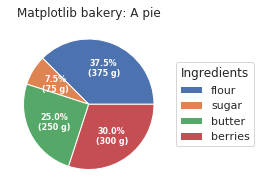

In [20]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["375 g flour",
          "75 g sugar",
          "250 g butter",
          "300 g berries"]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Matplotlib bakery: A pie")

plt.show()

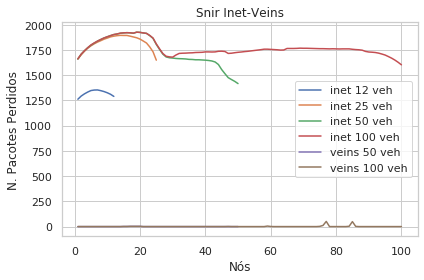

In [2]:
# Build the plot
fig, ax = plt.subplots()
ax.plot(df_inet_12['node'], df_inet_12['count'], label='inet 12 veh')
ax.plot(df_inet_25['node'], df_inet_25['count'], label='inet 25 veh')
ax.plot(df_inet_50['node'], df_inet_50['count'], label='inet 50 veh')
ax.plot(df_inet_100['node'], df_inet_100['count'], label='inet 100 veh')
ax.plot(df_veins_50['node'], df_veins_50['count'], label='veins 50 veh')
ax.plot(df_veins_100['node'], df_veins_100['count'], label='veins 100 veh')

ax.legend()
ax.set_ylabel('N. Pacotes Perdidos')
ax.set_xlabel('Nós')
ax.set_title('Snir Inet-Veins')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('line_plot_snir_all.png')
plt.show()

In [18]:
# inet
inet_12_mean = df_inet_12['count'].mean()
inet_12_std = df_inet_12['count'].std()

inet_25_mean = df_inet_25['count'].mean()
inet_25_std = df_inet_25['count'].std()

inet_50_mean = df_inet_50['count'].mean()
inet_50_std = df_inet_50['count'].std()

inet_100_mean = df_inet_100['count'].mean()
inet_100_std = df_inet_100['count'].std()
# veins
veins_50_mean = df_veins_50['count'].mean()
veins_50_std = df_veins_50['count'].std()

veins_100_mean = df_veins_100['count'].mean()
veins_100_std = df_veins_100['count'].std()

In [19]:
metricas = ['inet_12','inet_25', 'inet_50', 'inet_100', 'veins_50', 'veins_100']
x_pos = np.arange(len(metricas))
mean = [inet_12_mean, inet_25_mean, inet_50_mean, inet_100_mean, veins_50_mean, veins_100_mean]
std = [inet_12_std, inet_25_std, inet_50_std, inet_100_std, veins_50_std, veins_100_std]

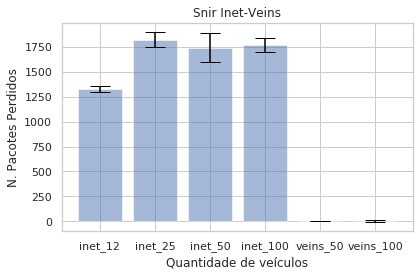

In [22]:
# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, mean, yerr=std, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('N. Pacotes Perdidos')
ax.set_xlabel('Quantidade de veículos')
ax.set_xticks(x_pos)
ax.set_xticklabels(metricas)
ax.set_title('Snir Inet-Veins')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_snir_all.png')
plt.show()